<div style="text-align: center;">
<h1>Assignment 3: Block Ciphers</font></h1>
<h2>Course: Elements of Applied Data Security</font></h2>

<center><img src="../images/unibo.png" alt="unibo_logo" width="200"/></center>

<h3>Professor: Alex Marchioni and Livia Manovi</font></h3>
<h3>University: Università degli Studi di Bologna</font></h3>
<h3>Author: Lluis Barca Pons</font></h3>
<h3>Date: 2024-05-07</font></h3>
</div>

## Importing libraries

In [23]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np

from blockcipher import *

# Part 1: Advanced Encryption Standard (AES)

## Input data

First we will plot the original image in order to see how it looks like.

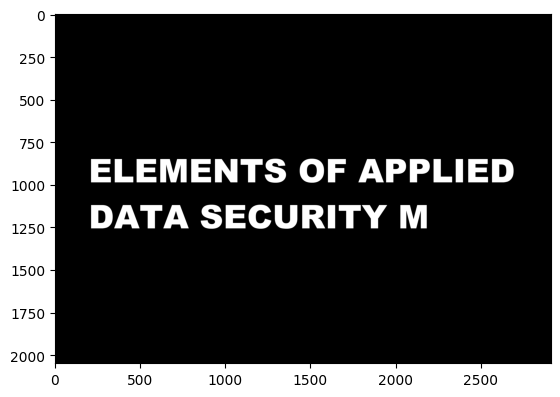

In [24]:
image = imread('../images/image.png').mean(axis=-1)

# Plot the original image
plt.imshow(image, cmap='gray')
plt.show()

Now we will convert this image in a numpy matrix array in order to be able to manipulate it.

In [25]:
image = (255 * image).astype(np.uint8)
print(image.shape)

(2048, 2912)


In [26]:
image_data = image.tobytes()
print(len(image_data))

5963776


Key and IV generation

In [27]:
key = get_random_bytes(16)
iv = get_random_bytes(16)

In [28]:
def display_cipher_image(cipher_data, shape):
    cipher_image = np.frombuffer(cipher_data, dtype=np.uint8).reshape(shape)
    plt.imshow(cipher_image, cmap='gray')
    plt.show()

### Encryption using ECB mode

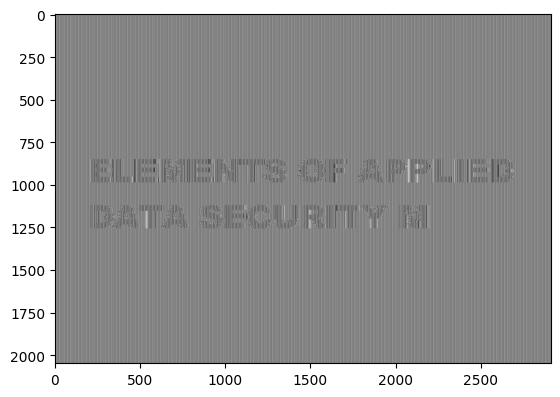

In [29]:
ecb = AES.new(key, AES.MODE_ECB)
encrypted_ecb = ecb.encrypt(image_data)
display_cipher_image(encrypted_ecb, image.shape)

### Encryption using CBC mode

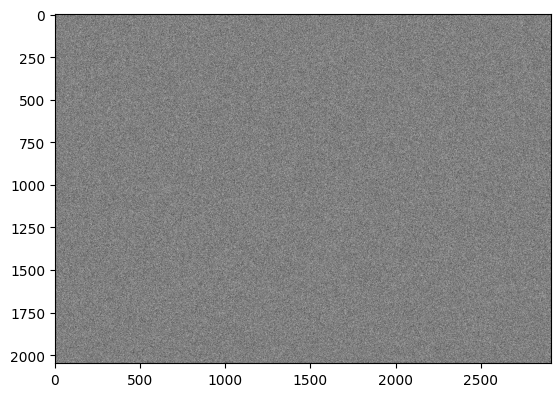

In [30]:
cbc = AES.new(key, AES.MODE_CBC, iv=iv)
encrypted_cbc = cbc.encrypt(image_data)
display_cipher_image(encrypted_cbc, image.shape)

### Encryption using CFB mode

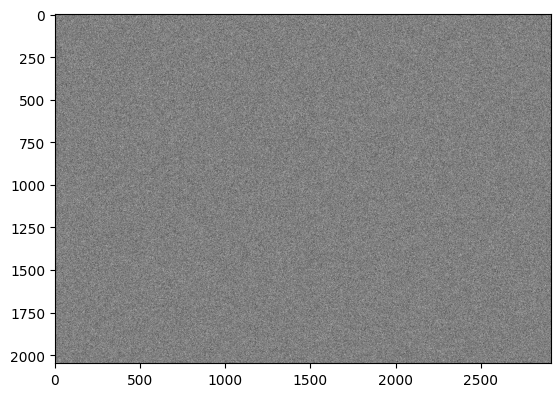

In [31]:
cfb = AES.new(key, AES.MODE_CFB, iv=iv)
encrypted_cfb = cfb.encrypt(image_data)
display_cipher_image(encrypted_cfb, image.shape)

### Encryption using CTR mode

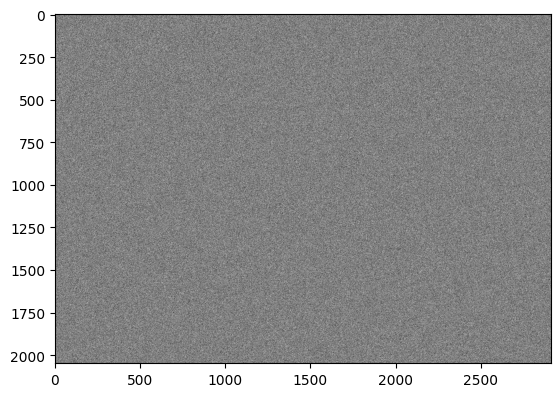

In [32]:
# CTR mode requires a nonce of 8 bytes because the block size is 16 bytes
ctr = AES.new(key, AES.MODE_CTR, nonce=get_random_bytes(8))
encrypted_ctr = ctr.encrypt(image_data)
display_cipher_image(encrypted_ctr, image.shape)

## Conclusion

From these results, we can readily appreciate the effectiveness of the various encryption modes. The last three modes appear to be quite effective for image processing, as the original plaintext image becomes unrecognizable; however, the first mode, the Electronic Codebook (ECB), is less effective compared to the others, as the text present in the unencrypted image is still discernible.

# Part 2: Monte Carlo Simulations

Monte Carlo simulations offer a fascinating approach to estimate the value of \(\pi\), the mathematical constant pivotal in geometry and science. This method leverages randomness and statistical principles, employing a simple yet effective visual experiment. By plotting random points within a square that encloses a quarter-circle, one can approximate \(\pi\) based on the proportion of points that fall inside the circle compared to the total number inside the square. The accuracy of the approximation improves with the number of points used, demonstrating the power of probabilistic techniques in solving problems that are analytically complex or intractable. This approach not only illustrates the concept of \(\pi\) but also introduces fundamental ideas in probability and statistical inference.

First of all we will create the method to make the Monte Carlo simulation:

Now we will run the simulation to see the plot of 10000 points and the approximation of $\pi$.

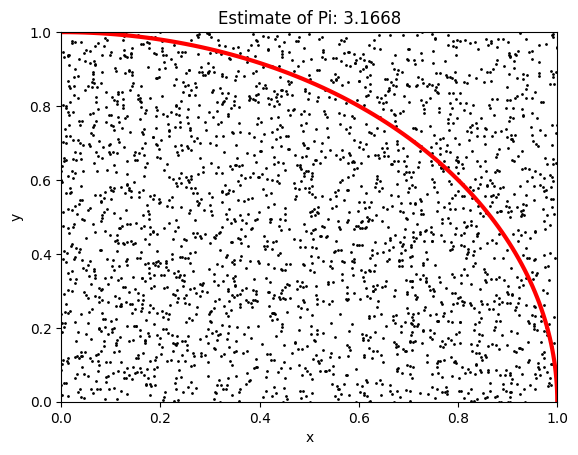

In [33]:
# Generate random points and plot them
num_samples = 10000
x = np.random.uniform(-1, 1, num_samples)
y = np.random.uniform(-1, 1, num_samples)
plt.plot(x, y, 'k.', markersize=2)

# Plot the quarter circle of radius 1
t = np.linspace(0, np.pi/2, 100)
xc = np.cos(t)
yc = np.sin(t)
plt.plot(xc, yc, 'r-', linewidth=3)

# Set the axis limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')

# Show the plot and the estimated value of pi
plt.title('Estimate of Pi: {:.4f}'.format(monte_carlo_pi(num_samples)))
plt.show()

Now we plot the estimation of $\pi$ as a function of the number of points used in the simulation. We will use a logarithmic scale to better visualize the convergence of the approximation and the decreasing error as the number of points increases.

Estimation of Pi:  3.142276


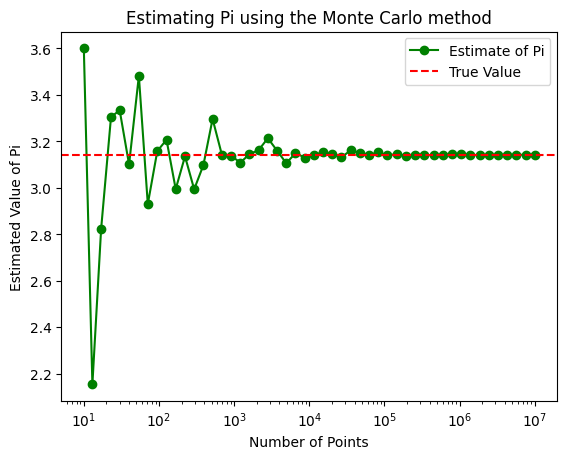

In [34]:
# Generate a list of sample sizes
sample_sizes = np.logspace(1, 7, num=50, dtype=int)

# Generate a list of estimates of pi for each sample size
pi_estimates = [monte_carlo_pi(n) for n in sample_sizes]
print("Estimation of Pi: ", pi_estimates[-1])

# Plot how the estimate of pi converges to the true value as more points are generated
fig, ax = plt.subplots()
ax.plot(sample_sizes, pi_estimates, 'o-', color='green', label='Estimate of Pi')
ax.axhline(np.pi, color='r', linestyle='--', label='True Value')
ax.set_xscale('log')
ax.set_xlabel('Number of Points')
ax.set_ylabel('Estimated Value of Pi')
ax.set_title('Estimating Pi using the Monte Carlo method')
ax.legend()
plt.show()

Also, we plot the error of the approximation:

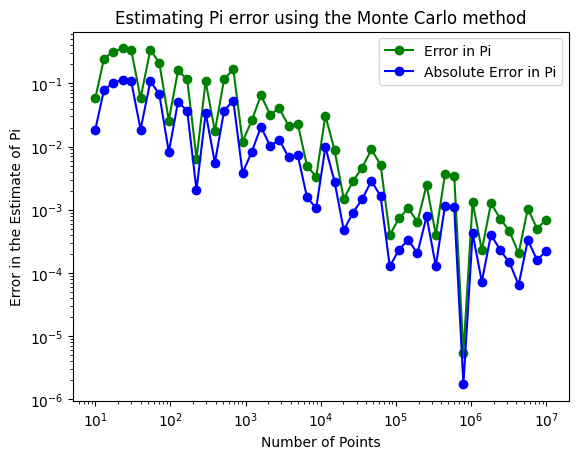

In [35]:
# Generate a list of sample sizes
sample_sizes = np.logspace(1, 7, num=50, dtype=int)

# Generate a list of estimates of pi for each sample size
pi_estimates = np.array([monte_carlo_pi(n) for n in sample_sizes])

# Calculate the absolute error in the estimate of pi for each sample size
pi_error = np.abs(pi_estimates - np.pi)
pi_abs_error = pi_error / np.pi

# Plot the pi error and the absolute error as a function of the number of points
fig, ax = plt.subplots()
ax.plot(sample_sizes, pi_error, 'o-', color='green', label='Error in Pi')
ax.plot(sample_sizes, pi_abs_error, 'o-', color='blue', label='Absolute Error in Pi')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Points')
ax.set_ylabel('Error in the Estimate of Pi')
ax.set_title('Estimating Pi error using the Monte Carlo method')
ax.legend()
plt.show()

In conclusion, Monte Carlo method is an effective statistical tool capable of estimating pi with considerable precision. This technique involves creating random points and determining the ratio of those that land inside a circle versus those that fall outside. From this ratio, we can derive an estimate for pi. The accuracy of this estimate improves as more points are generated.

# Part 3: Diffusion and Confusion with AES

## Diffusion part

In the following code block we have the different parameters that we will use to test the diffusion and confusion properties of AES.

In [36]:
key_16 = get_random_bytes(16)
key_24 = get_random_bytes(24)
key_32 = get_random_bytes(32)

plaintext = get_random_bytes(16)
iterations = len(plaintext) * 8

Note that iterations is the maximum number of bits that can be flipped because the plaintext is 16 bytes long, which is 128 bits. If we flip more than 128 bits, we will be flipping the key itself, which will make the decryption impossible.

Now we will analyse the diffusion and confusion only of ECB mode of AES because it is the only that does not use an IV or a nonce; so it doesnt have the feedback.

### Diffusion ECB

In [37]:
# Encrypt the plaintexts for each key size
ciphertext_ecb_16 = encrypt_by_mode(plaintext=plaintext, key=key_16, mode="ecb")
ciphertext_ecb_24 = encrypt_by_mode(plaintext=plaintext, key=key_24, mode="ecb")
ciphertext_ecb_32 = encrypt_by_mode(plaintext=plaintext, key=key_32, mode="ecb")

In [38]:
# Create a lists of modified plaintexts with different key lenghts
mod_plaintext_ecb_16 = create_modified_plaintexts(iterations, plaintext, key_16, "ecb")
mod_plaintext_ecb_24 = create_modified_plaintexts(iterations, plaintext, key_24, "ecb")
mod_plaintext_ecb_32 = create_modified_plaintexts(iterations, plaintext, key_32, "ecb")

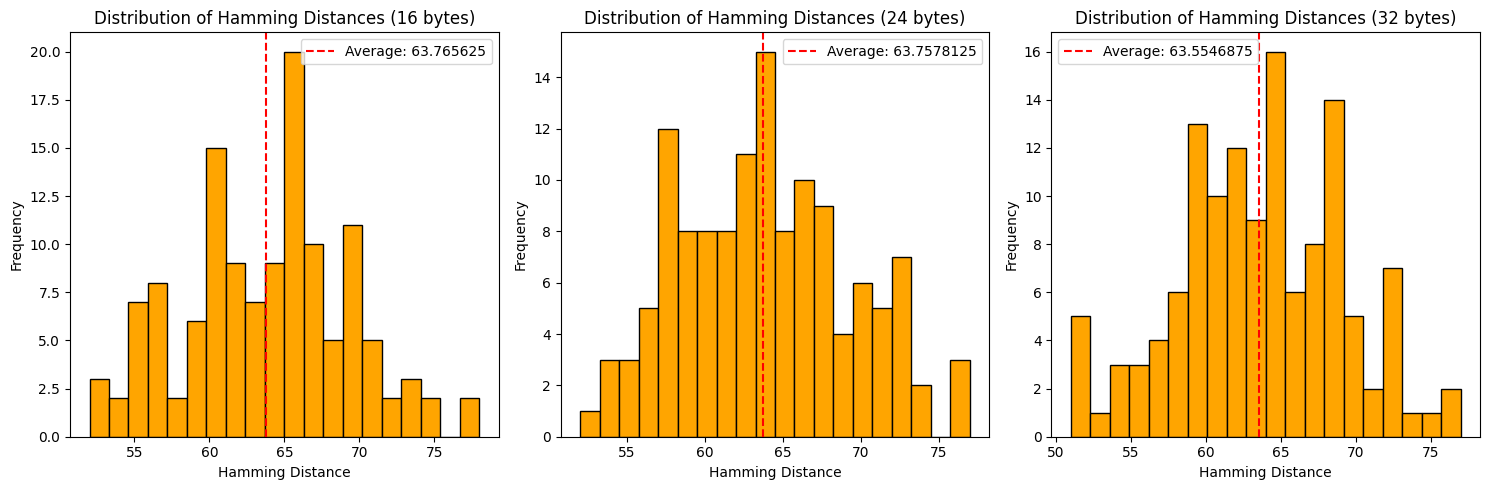

In [39]:
# Calculate the Hamming distance between the original ciphertext and the modified plaintexts for each key size
hamming_distances_16, average_16 = n_hamming_distance(iterations, ciphertext_ecb_16, mod_plaintext_ecb_16)
hamming_distances_24, average_24 = n_hamming_distance(iterations, ciphertext_ecb_24, mod_plaintext_ecb_24)
hamming_distances_32, average_32 = n_hamming_distance(iterations, ciphertext_ecb_32, mod_plaintext_ecb_32)

# Make a plot of subplots for each key size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for 16, 24 and 32 bytes
axs[0] = plot_histogram(hamming_distances_16, average_16, axs[0], "orange", "16 bytes")
axs[1] = plot_histogram(hamming_distances_24, average_24, axs[1], "orange", "24 bytes")
axs[2] = plot_histogram(hamming_distances_32, average_32, axs[2], "orange", "32 bytes")

plt.tight_layout()
plt.show()

## Confusion part

*Note that in this part we reuse the ciphertexts from the previous part.*

Relevant aspect of the calculation of the iterations in confusion use cases:
- We know for confusion analysis we have to test with diferent key lengths, so we can test with 32, 24, 16 bytes because AES supports these key lengths.

The solution is to make a key list for each ley length flipping the bits of the original key.


In [40]:
mod_keys_16 = modify_key(key_16)
mod_keys_24 = modify_key(key_24)
mod_keys_32 = modify_key(key_32)

### Confusion ECB

In [41]:
mod_plaintext_ecb_16 = create_modified_plaintexts_by_keys(iterations, plaintext, mod_keys_16, "ecb")
mod_plaintext_ecb_24 = create_modified_plaintexts_by_keys(iterations, plaintext, mod_keys_24, "ecb")
mod_plaintext_ecb_32 = create_modified_plaintexts_by_keys(iterations, plaintext, mod_keys_32, "ecb")

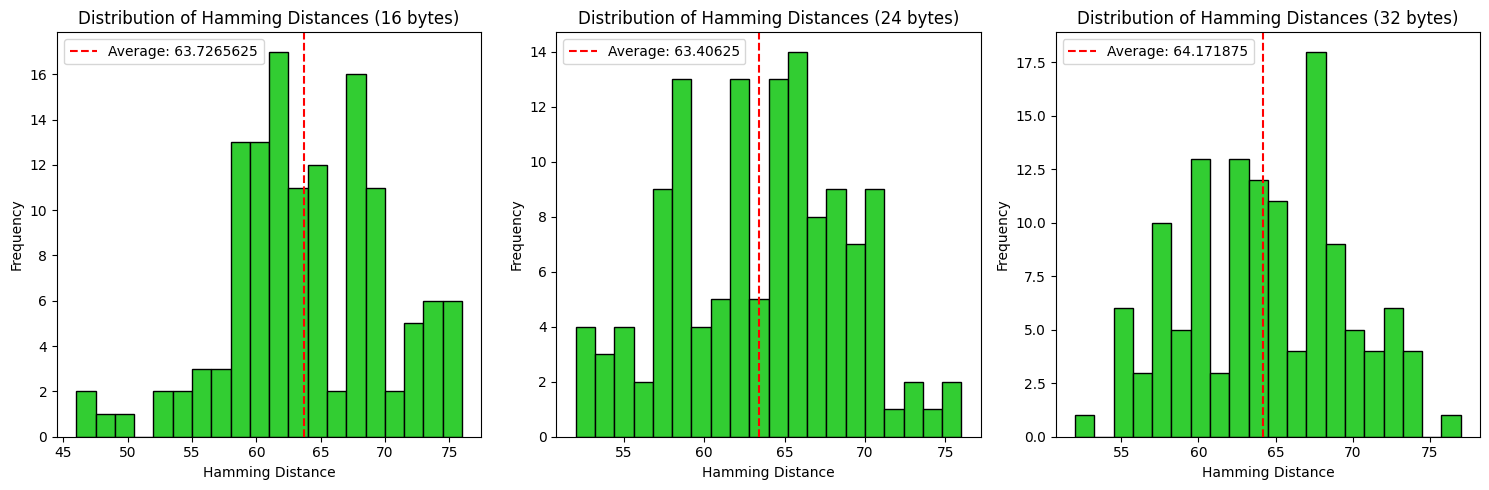

In [42]:
hamming_distances_16, average_16 = n_hamming_distance(iterations, ciphertext_ecb_16, mod_plaintext_ecb_16)
hamming_distances_24, average_24 = n_hamming_distance(iterations, ciphertext_ecb_24, mod_plaintext_ecb_24)
hamming_distances_32, average_32 = n_hamming_distance(iterations, ciphertext_ecb_32, mod_plaintext_ecb_32)

# Make a plot of subplots for each key size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for 16, 24 and 32 bytes
axs[0] = plot_histogram(hamming_distances_16, average_16, axs[0], "limegreen", "16 bytes")
axs[1] = plot_histogram(hamming_distances_24, average_24, axs[1], "limegreen", "24 bytes")
axs[2] = plot_histogram(hamming_distances_32, average_32, axs[2], "limegreen", "32 bytes")

plt.tight_layout()
plt.show()

## Questions

- **How does the distribution of Hamming distances change by varying the length
of the key?**


- **Are there any differences between diffusion and confusion?**

# Conclusions